## Final metrics

Here we have the best configurations for the three selected models, let's see how the behave of the test data.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

## Data

In [19]:
data = pd.read_csv("text_databases/Dmoz-Sports.csv")
data.fillna('', inplace=True)
data

,file_name,text,class
0,3191005.txt,"Bryant Bulldogs Official site with news, sched...",Baseball
1,3193010.txt,Hirschbeck v. Alomar Covers a legal case betwe...,Baseball
2,3190744.txt,Mountaineers Baseball Official site. Includes ...,Baseball
3,3193695.txt,"M.S.H. Little League Contains news items, a li...",Baseball
4,3193486.txt,Quotations: Bob Uecker Baseball Almanac collec...,Baseball
...,...,...,...
13495,3274147.txt,"IMDb.com - Dwayne Johnson Filmography, awards,...",Wrestling
13496,3273536.txt,"Suwannee Wrestling Includes pictures, and stat...",Wrestling
13497,3274032.txt,"Jeff's Swanton Biography, facts and wallpapers.",Wrestling
13498,3274152.txt,Roddy Piper Tribute Includes background inform...,Wrestling


In [20]:
from sklearn.model_selection import train_test_split

# Same split used on hyperparameters search
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['class'],
                                                    test_size=0.2, random_state=14,
                                                    stratify=data['class'])

split_data = [X_train, X_test, y_train, y_test]

## MultinomialNB

In [18]:
df = pd.read_csv("/home/user/unb/unb_mestrado/2_semestre/topicos_nlp/nlp/outputs/MultinomialNB_grid_results.csv")
df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.897068,0.157417,0.114638,0.015831,0.20,{'alpha': 0.2},0.809722,0.822222,0.829167,0.822685,0.801389,0.817037,0.010043,1
2,0.962818,0.107601,0.144813,0.037077,0.50,{'alpha': 0.5},0.806944,0.824537,0.829630,0.818056,0.804167,0.816667,0.009825,2
0,0.697592,0.120070,0.106411,0.014254,0.10,{'alpha': 0.1},0.811574,0.819907,0.825926,0.820370,0.803704,0.816296,0.007788,3
3,0.980150,0.161476,0.138497,0.036620,0.75,{'alpha': 0.75},0.805093,0.820833,0.823611,0.815278,0.805093,0.813981,0.007738,4
4,1.024190,0.212656,0.152066,0.060670,1.00,{'alpha': 1},0.803704,0.815278,0.820370,0.810185,0.801852,0.810278,0.006944,5
5,1.087031,0.238688,0.137359,0.047433,1.50,{'alpha': 1.5},0.805556,0.810185,0.814352,0.806481,0.800463,0.807407,0.004657,6
6,1.115224,0.280644,0.140028,0.039944,2.00,{'alpha': 2},0.802315,0.806944,0.813426,0.801389,0.798148,0.804444,0.005300,7
7,0.847224,0.125853,0.055421,0.020471,5.00,{'alpha': 5},0.786111,0.787037,0.806944,0.786111,0.792130,0.791667,0.007960,8


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      8 non-null      float64
 1   std_fit_time       8 non-null      float64
 2   mean_score_time    8 non-null      float64
 3   std_score_time     8 non-null      float64
 4   param_alpha        8 non-null      float64
 5   params             8 non-null      object 
 6   split0_test_score  8 non-null      float64
 7   split1_test_score  8 non-null      float64
 8   split2_test_score  8 non-null      float64
 9   split3_test_score  8 non-null      float64
 10  split4_test_score  8 non-null      float64
 11  mean_test_score    8 non-null      float64
 12  std_test_score     8 non-null      float64
 13  rank_test_score    8 non-null      int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 1.0+ KB


In [21]:
from ast import literal_eval

# best params
best_params = literal_eval(df.sort_values(by="rank_test_score").iloc[1]["params"])
best_params

{'alpha': 0.5}

In [22]:
from sklearn.naive_bayes import MultinomialNB

best_nb = MultinomialNB(**best_params)
best_nb.get_params()

{'alpha': 0.5, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

              precision    recall  f1-score   support

    Baseball       0.74      0.71      0.72       100
  Basketball       0.83      0.74      0.78       100
     Bowling       0.90      0.87      0.88       100
     Cricket       0.67      0.91      0.77       100
     Cycling       0.82      0.89      0.86       100
  Equestrian       0.92      0.83      0.87       100
     Fencing       0.82      0.89      0.85       100
      Flying       0.70      0.86      0.77       100
    Football       0.73      0.53      0.61       100
        Golf       0.84      0.81      0.83       100
  Gymnastics       0.84      0.86      0.85       100
      Hockey       0.78      0.53      0.63       100
    Lacrosse       0.67      0.84      0.75       100
     Martial       0.95      0.97      0.96       100
 Motorsports       0.86      0.70      0.77       100
   Paintball       0.90      0.94      0.92       100
     Running       0.86      0.83      0.85       100
     Skating       0.87    

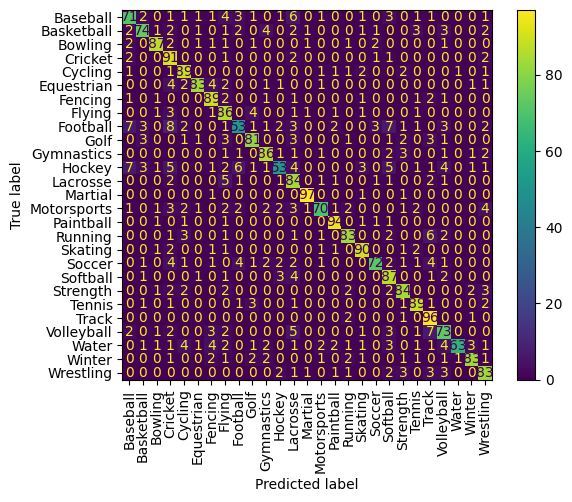

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

tfidf = TfidfVectorizer(ngram_range=(1,3))

# fit only on train
X_train_csr = tfidf.fit_transform(X_train)
X_test_csr = tfidf.transform(X_test)

best_nb.fit(X_train_csr, y_train)
preds = best_nb.predict(X_test_csr)

print(classification_report(y_test, preds))

ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=preds,
    xticks_rotation=90
)

plt.show()

## LogisticRegression

In [25]:
df = pd.read_csv("/home/user/unb/unb_mestrado/2_semestre/topicos_nlp/nlp/outputs/LogisticRegression_grid_results.csv")
df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,11.503161,1.056282,0.129310,0.031925,1.0000,l2,saga,0.0001,"{'C': 1, 'penalty': 'l2', 'solver': 'saga', 't...",0.868056,0.858796,0.867130,0.862963,0.857407,0.862870,0.004277,1
14,130.186906,6.469831,0.058212,0.026933,1.0000,l2,lbfgs,0.0001,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs', '...",0.866667,0.858333,0.866667,0.862963,0.857407,0.862407,0.003954,2
8,92.078277,4.465383,0.146872,0.074486,1.0000,l1,saga,0.0001,"{'C': 1, 'penalty': 'l1', 'solver': 'saga', 't...",0.831481,0.819907,0.816204,0.828241,0.833333,0.825833,0.006660,3
13,1.291288,0.100626,0.133860,0.018223,1.0000,l2,saga,1.0000,"{'C': 1, 'penalty': 'l2', 'solver': 'saga', 't...",0.756944,0.750000,0.771296,0.808796,0.805093,0.778426,0.024306,4
6,6.408795,0.664438,0.165440,0.035683,0.0001,l2,lbfgs,0.0001,"{'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfg...",0.769907,0.769444,0.776852,0.755556,0.769907,0.768333,0.006957,5
9,2.101646,0.185860,0.125810,0.034897,1.0000,l1,saga,1.0000,"{'C': 1, 'penalty': 'l1', 'solver': 'saga', 't...",0.798611,0.717593,0.742593,0.689815,0.782407,0.746204,0.040171,6
4,139.646434,11.344553,0.108898,0.009745,0.0001,l2,saga,0.0001,"{'C': 0.0001, 'penalty': 'l2', 'solver': 'saga...",0.612500,0.572685,0.606944,0.593981,0.586574,0.594537,0.014268,7
0,1.302530,0.238343,0.114376,0.025054,0.0001,l1,saga,0.0001,"{'C': 0.0001, 'penalty': 'l1', 'solver': 'saga...",0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.000000,8
1,1.380401,0.243529,0.150989,0.052190,0.0001,l1,saga,1.0000,"{'C': 0.0001, 'penalty': 'l1', 'solver': 'saga...",0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.000000,8
15,2.068122,0.148113,0.112661,0.020890,1.0000,l2,lbfgs,1.0000,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs', '...",0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.000000,8


In [26]:
from ast import literal_eval

# best params
best_params = literal_eval(df.sort_values(by="rank_test_score").iloc[1]["params"])
best_params

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}

In [27]:
from sklearn.linear_model import LogisticRegression

best_logreg = LogisticRegression(**best_params)
best_logreg.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

              precision    recall  f1-score   support

    Baseball       0.83      0.79      0.81       100
  Basketball       0.89      0.80      0.84       100
     Bowling       0.95      0.93      0.94       100
     Cricket       0.97      0.84      0.90       100
     Cycling       0.79      0.88      0.83       100
  Equestrian       0.94      0.83      0.88       100
     Fencing       0.94      0.89      0.91       100
      Flying       0.76      0.91      0.83       100
    Football       0.64      0.76      0.69       100
        Golf       0.93      0.90      0.91       100
  Gymnastics       0.99      0.87      0.93       100
      Hockey       0.82      0.75      0.78       100
    Lacrosse       0.99      0.97      0.98       100
     Martial       0.93      0.98      0.96       100
 Motorsports       0.77      0.77      0.77       100
   Paintball       0.86      0.95      0.90       100
     Running       0.93      0.91      0.92       100
     Skating       0.96    

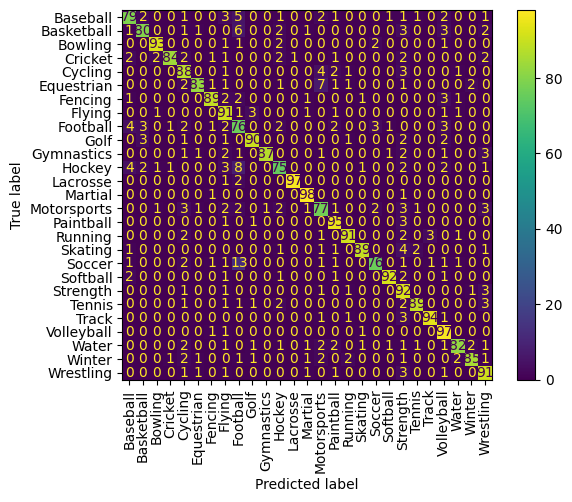

In [28]:
tfidf = TfidfVectorizer(ngram_range=(1,3))

# fit only on train
X_train_csr = tfidf.fit_transform(X_train)
X_test_csr = tfidf.transform(X_test)

best_logreg.fit(X_train_csr, y_train)
preds = best_logreg.predict(X_test_csr)

print(classification_report(y_test, preds))

ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=preds,
    xticks_rotation=90
)

plt.show()

## The mysterious competitor